In [10]:
import pandas as pd
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Exercise 1

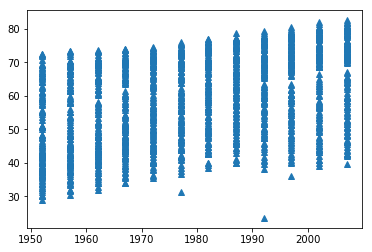

In [11]:
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
plt.plot(data['year'], data['lifeExp'], "^")

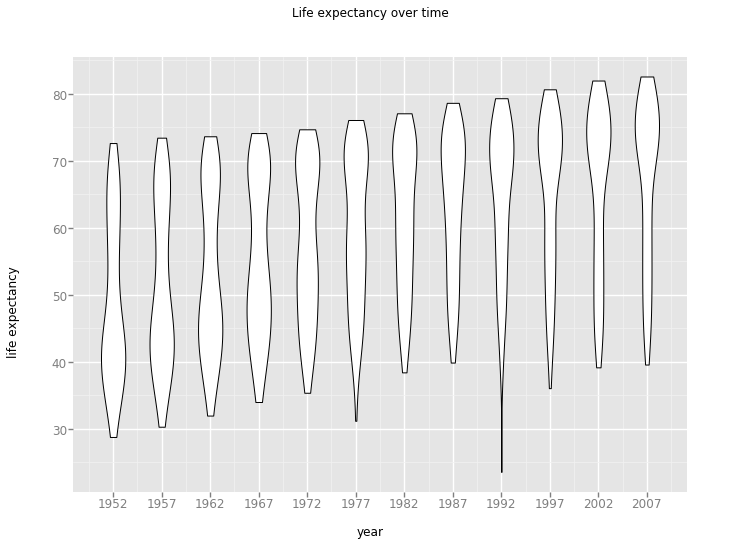

<ggplot: (8731986069224)>

In [12]:
import ggplot
from ggplot import *
ggplot(aes(x='year', y='lifeExp'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")

In [13]:
## Question 1

In [14]:
## Question 2
# During the the earlier years such as years 1952-1982, it is skewed towards the bottom. This means the life expectancy is 
# lower during these years in most countries.

## Question 3
## Question 4
## Question 5

In [15]:
## Exercise 2
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression()
e2_X = [[x] for x in data['year'].values]
e2_Y = [[y] for y in data['lifeExp'].values]
regfit = reg.fit(e2_X, e2_Y)

In [16]:
## Question 6
## Question 7

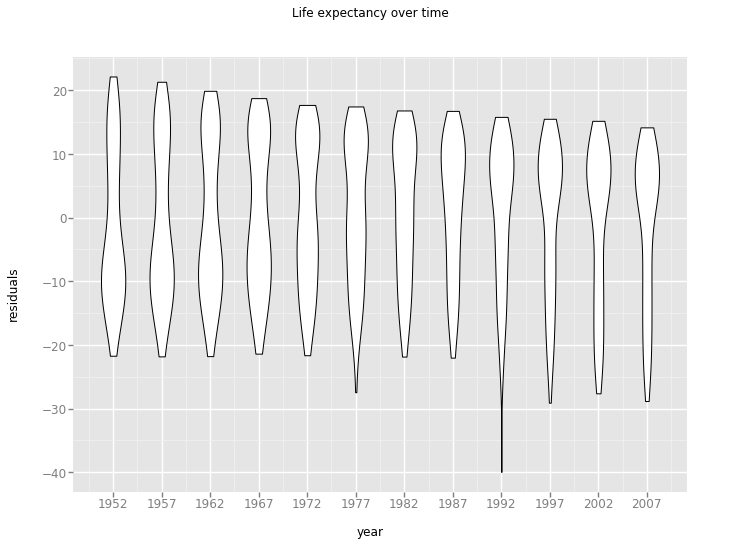

<ggplot: (8731986034103)>

In [17]:
##Exercise 3
pred_lifeExps = []
for x in data['year'].values:
    #print(regfit.predict(x)[0][0])
    pred_lifeExps.append(regfit.predict(x)[0][0])
data['pred_lifeExp'] = pd.Series(pred_lifeExps, index = data.index)
data['residual'] = data['lifeExp'] - data['pred_lifeExp']
ggplot(aes(x='year', y='residual'), data=data) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "residuals")
    

In [18]:
## Question 8

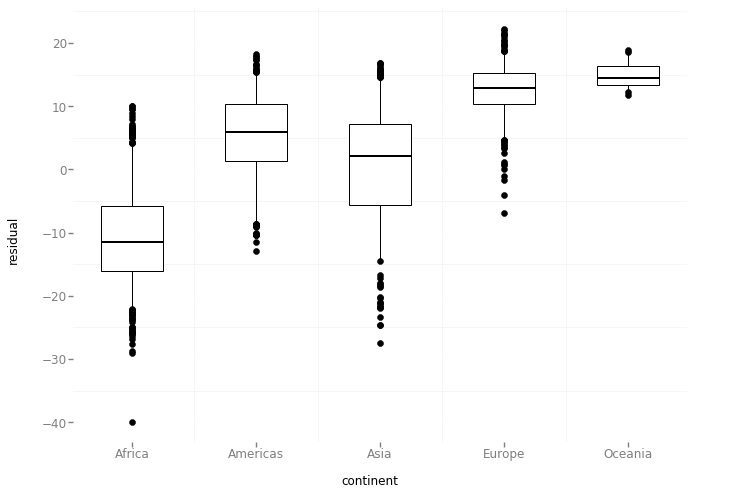

<ggplot: (-9223363304857543245)>

In [19]:
## Exercise 4

ggplot(aes(x='continent', y='residual'), data=data) +\
  geom_boxplot() +\
theme_bw()

In [20]:
## Question 9



/opt/conda/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


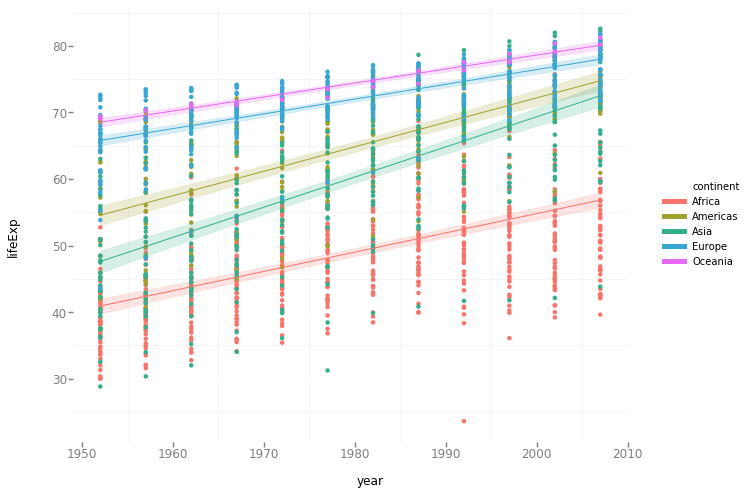

<ggplot: (-9223363304878530209)>

In [21]:
## Exercise 5
# geom_line() <---- Optional

ggplot(aes(x='year', y='lifeExp', color='continent'), data=data) +\
    stat_smooth(method = "lm", se=True, span=0.2) +\
    geom_point(size=20) +\
    theme_bw()


In [22]:
## Question 10



In [23]:
##Exercise 6
import statsmodels.api as sm
from statsmodels.formula.api import ols
temp = data['continent'].values
temp2 = []
for x in temp:
    if x == 'Africa': 
        temp2.append(1)
    elif x == 'Americas':
        temp2.append(2)
    elif x == 'Asia':
        temp2.append(3)
    elif x == 'Europe':
        temp2.append(4)
    else:
        temp2.append(5)
data['continent_index'] = pd.Series(temp2, index = data.index)
regression = ols(formula='lifeExp ~ year + continent_index + year * continent_index', data=data).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     823.1
Date:                Wed, 15 Nov 2017   Prob (F-statistic):               0.00
Time:                        22:26:40   Log-Likelihood:                -6012.8
No. Observations:                1704   AIC:                         1.203e+04
Df Residuals:                    1700   BIC:                         1.206e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -620.1888     49.828    -12.447      0.000    -717.919    -522.459
year                     0.3354      0.025     13.324      0.000       0.286       0.385
continent_index         14.8163     18.977      0.781      0.435     -22.404      52.037
year:continent_index    -0.0041      0.010     -0.424      0.672      -0.023       0.015
==============================================================================
Omnibus:                       30.839   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.444
Skew:                          -0.295   Prob(JB):                     5.47e-08
Kurtosis:                       3.352   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
## Exercise 7
## Ftest for Exercise 6
table = sm.stats.anova_lm(regression, typ=2)
table

,sum_sq,df,F,PR(>F)
year,53919.184217,1.0,791.157248,2.990795e-143
continent_index,114358.064030,1.0,1677.978118,9.153874e-256
year:continent_index,12.229590,1.0,0.179445,6.719042e-01
Residual,115858.905916,1700.0,NaN,NaN


In [25]:
## Ftest for Exercise 2
regression2 = ols(formula='lifeExp ~ year', data=data).fit()
table2 = sm.stats.anova_lm(regression2, typ=2)
table2

,sum_sq,df,F,PR(>F)
year,53919.184217,1.0,398.604746,7.546795e-80
Residual,230229.199536,1702.0,NaN,NaN


In [26]:
## Question 13

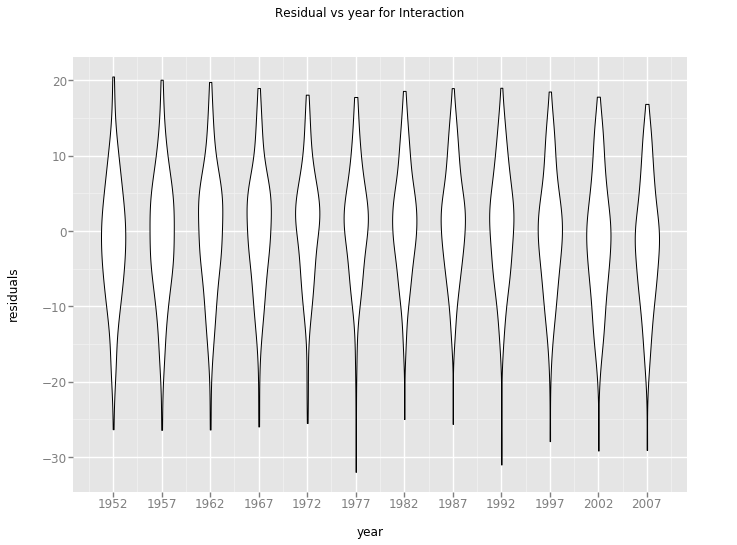

<ggplot: (8731975958571)>

In [27]:
## Exercise 8
pred_lifeExps2 = []
    #print(regfit.predict(x)[0][0])
pred_lifeExps2 = regression.predict()
data['pred_lifeExp2'] = pd.Series(pred_lifeExps2, index = data.index)
data['residual2'] = data['lifeExp'] - data['pred_lifeExp2']
ggplot(aes(x='year', y='residual2'), data=data) +\
    geom_violin() +\
    labs(title="Residual vs year for Interaction",
         x = "year",
         y = "residuals")

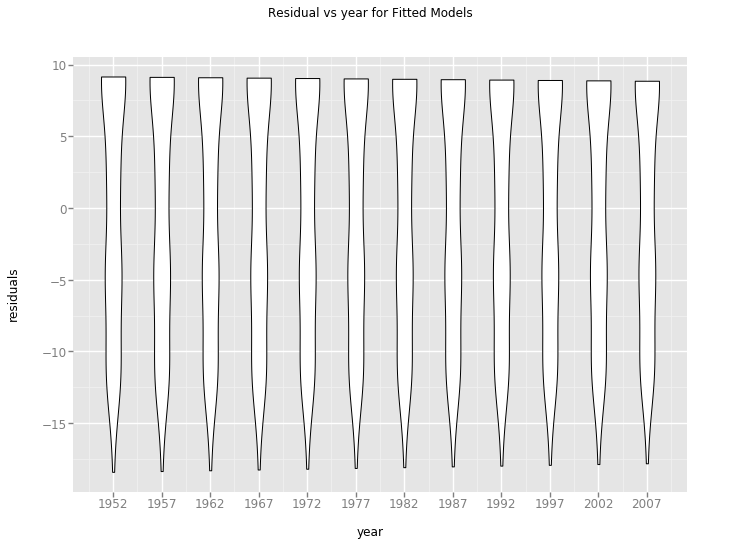

<ggplot: (8731985962956)>

In [28]:
data['residual3'] = data['pred_lifeExp'] - data['pred_lifeExp2']
ggplot(aes(x='year', y='residual3'), data=data) +\
    geom_violin() +\
    labs(title="Residual vs year for Fitted Models",
         x = "year",
         y = "residuals")

In [29]:
#Part 2
#Problem 1
"""
    X : D-dimensional array of training examples (Say this is NxD -- N examples x D features)
    Y : one-dimensional array of training labels, corresponding to each example.  (if X has dimensions
        NxD, then Y must be a 1xN.  This is the equivalent of one label per example).
    alpha : step-size
    K : Number of iterations
    N: how many vectors in X and elements in Y
"""

def grad_descent(X, Y, alpha, K, N):

    #initialize weights and loss
    theta = np.zeroes(D)
    loss = np.zeroes(K)

    for k in range(K):
        #make predictions for kth iteration
        Yhat = X.dot(theta)
        
        #compute loss and gradient by taking partial derivative of our loss function with respect to our weights theta
        for i in range(N):
            loss[k] += compute_loss(Y[i], Yhat)
            gradient += compute_gradient(X[i], Y[i], theta)

        #update theta by taking a step in direction of gradient
        theta = theta - alpha * gradient

    return theta, loss

Problem 2: Derived Equation
$$ B^{k+1} = B^k + \alpha \sum_{i=1}^{n} [y_i - (\frac{e^{B^k * x_i}}{1 + e^{B^k * x_i}})] x_i $$

In [101]:
#Problem 3
import numpy as np
import math as m
def grad_descent(X, Y, alpha, K, N):

    #initialize weights and loss
    theta = np.zeros(len(X[0]))
    loss = np.zeros(K)
    gradient = 0
    for k in range(K):
        
        #compute loss and gradient by taking partial derivative of our loss function with respect to our weights theta
        for i in range(N):
            loss[k] += compute_loss(X[i], Y[i], theta)
            gradient += loss[k] * X[i]
            print(loss[k])

        #update theta by taking a step in direction of gradient
        theta = theta - alpha * gradient

    return theta, loss
def compute_loss(x, y, theta):
    return y - (m.exp(np.dot(theta, x))/(1+m.exp(np.dot(theta, x))))

In [102]:
#Problem 4
#simulate data for linear regression
from sklearn import datasets
gen_data_x, gen_data_y = datasets.make_regression(n_samples=5, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = datasets.make_regression(n_samples=5, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

In [103]:
#a really bad estimator
#returns random vector as estimated parameters
(theta, loss) = grad_descent(log_gen_data_x, log_gen_data_y, 5, 5, len(log_gen_data_y))
plt.plot(theta, loss, '*')

-0.5
0.0
-0.5
0.0
-0.5
-1.0
-4.03813404937e-08
-1.00000004038
-0.000243775786478
-1.00024377579
-1.0
0.0
-1.0
-3.66373598126e-15
-1.0
-1.0
0.0
-1.0
0.0
-1.0


OverflowError: math range error

In [ ]:
$$latex B^{k+1} = B^k + \alpha \sum_{i=1}^{n} [y_i - (\frac{e^{B^k * x_i}}{1 + e^{B^k * x_i}})] x_i